# MA2K4 Assignment 3

Student ID - 2103654 and 2161367

### 3.7) a)

In [1]:
# Libraries
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd

# Defining composite trapezoidal rule
def composite_trapezoidal(f, a, b, n):
    h = (b - a) / n
    arr = np.linspace(a, b, n + 1)
    temp = 0
    ret = 0
    for i in range(n - 1):
        temp += f(arr[i + 1])
    ret = h * (0.5 * f(arr[0]) + temp + 0.5 * f(arr[-1]))
    return ret

# Defining composite Simpson rule
def composite_simpson(f, a, b, n):
    num = 2 * n + 1
    h = (b - a) / (2 * n)
    arr = np.linspace(a, b, num)
    tempA = 0
    tempB = 0
    ret = 0
    for i in range(1, n + 1):
        tempA += 4 * f(arr[2 * i - 1])
    for j in range(1, n + 1):
        tempB += 2 * f(arr[2 * j - 2])
    ret = (1 / 3) * h * (f(arr[0]) + tempA + tempB + f(arr[-1]))
    return ret

# 3.7) a) computing an estimate for tan(x)
# function tan(x)
def tanx(x):
    return np.tan(x)

# Setting initial values
a = 0
b = 1
n = 10

result = np.log(1/np.cos(1)) - np.log(1/np.cos(0)) # Computing true value by integrating tan(x) = ln(sec(x))
print("True value for the integral of tan(x) on interval [0, 1] is:", result)
print("Estimates using the composite trapezoidal rule is:", composite_trapezoidal(tanx, a, b, n))
print("Estimates using the composite Simpson rule is:", composite_simpson(tanx, a, b, n))

True value for the integral of tan(x) on interval [0, 1] is: 0.6156264703860141
Estimates using the composite trapezoidal rule is: 0.6176402491518626
Estimates using the composite Simpson rule is: 0.6156283352495472


### 3.7) b)

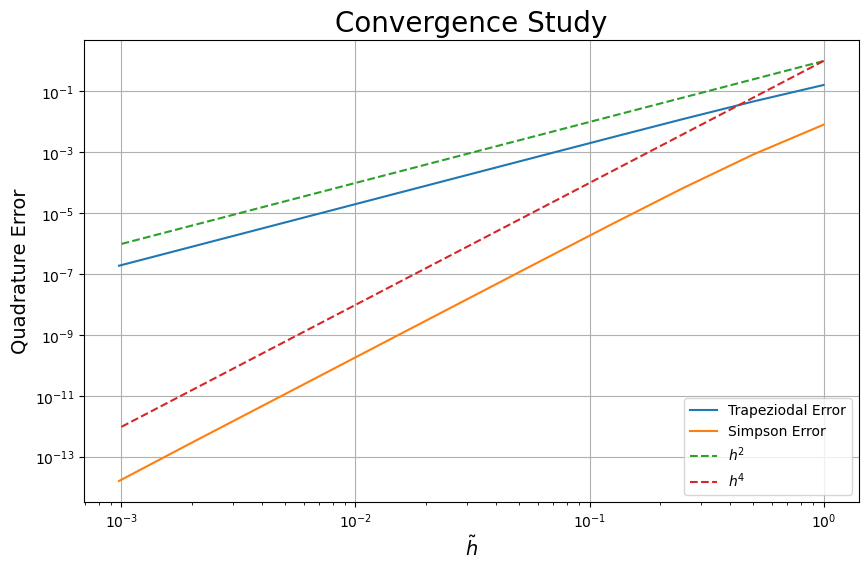

In [2]:
a = 0
b = 1
result = np.log(1/np.cos(1)) - np.log(1/np.cos(0)) # From above
trapErr = []
simpErr = []
hArr = []

for i in range(11):
    n = 2 ** i
    h = 1 / n
    hArr.append(h)
    tempTrap = np.abs(result - composite_trapezoidal(tanx, a, b, n))
    trapErr.append(tempTrap)
    tempSimp = np.abs(result - composite_simpson(tanx, a, b, n))
    simpErr.append(tempSimp)
    
# h ^ gamma
def gfunc(h, gamma):
    return np.power(h, gamma)

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(hArr, trapErr, label='Trapeziodal Error')
plt.loglog(hArr, simpErr, label='Simpson Error')
plt.loglog(hArr, gfunc(hArr, 2), '--', label = "$h^2$")
plt.loglog(hArr, gfunc(hArr, 4), '--', label = "$h^4$")

# Graph Settings
plt.title('Convergence Study', fontsize = 20)
plt.xlabel('$\~h$', fontsize = 14)
plt.ylabel('Quadrature Error', fontsize = 14)
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Regarding quadrature error, the trapezoidal rule has an error scaling like $h^2$ and the Simpson rule has an error scaling like $h^4$. For an error \~$h^2$ we expect the error, after doubling the number of nodes, to be cut by a factor of 4. For the midpoint and trapezoidal rules, we expect plotting (in a log-log plot) the error against h to be a line with slope 2, i.e. an error of order two. The error is of order $\gamma$. For the Simpson-Cavalieri rule, we expect a line with slope 4, i.e. an error of order four. 

### 3.7) c)

In [3]:
# Initialise lists to store data
trapEval = []
simpEval = []

# Calculate errors and function evaluations
for i in range(11):
    n = 2 ** i
    h = 1 / n
    
    # Calculate function evaluations
    trapEval.append(n + 1)  # Trapezoidal rule requires n + 1 function evaluations
    simpEval.append(2 * n + 1)  # Simpson's rule requires 2n + 1 function evaluations

# Compile the data into a DataFrame
data = {
    'h~': hArr,
    'error I_1,n': trapErr,
    'eval I_1,n': trapEval,
    'error I_2,n': simpErr,
    'eval I_2,n': simpEval
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

          h~   error I_1,n  eval I_1,n   error I_2,n  eval I_2,n
0   1.000000  1.630774e-01           2  8.143144e-03           3
1   0.500000  4.687671e-02           3  8.540487e-04           5
2   0.250000  1.235971e-02           5  6.688785e-05           9
3   0.125000  3.140094e-03           9  4.507725e-06          17
4   0.062500  7.884043e-04          17  2.877269e-07          33
5   0.031250  1.973169e-04          33  1.808105e-08          65
6   0.015625  4.934278e-05          65  1.131618e-09         129
7   0.007812  1.233654e-05         129  7.075063e-11         257
8   0.003906  3.084189e-06         257  4.422018e-12         513
9   0.001953  7.710506e-07         513  2.764455e-13        1025
10  0.000977  1.927628e-07        1025  1.676437e-14        2049


The Simpson rule reaches the target error of $10^{-6}$ at $n=4$ with 33 function evaluations; whereas, the trapezoidal rule reaches the target error of $10^{-6}$ at $n=9$ with 513 function evaluations. Therefore, the Simpson method is the most efficient in terms of function evaluations to reach an error of $10^{-6}$.

### 3.8)

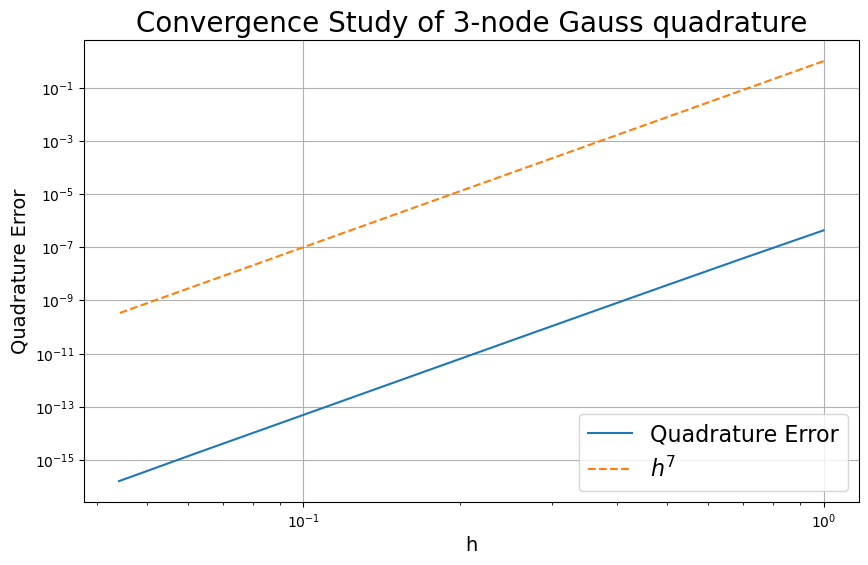

In [13]:
# Defining 3-node Gauss quadrature
def gaussQuad(f, a, b):
    h = b - a
    temp = 0.5 * (a + b)
    ret = h * 0.5 * (5/9 * f(temp - np.sqrt(3/5) * 0.5 * h) + 8/9 * f(temp) + 5/9 * f(temp + np.sqrt(3/5) * 0.5 * h))
    return ret

# Defining cos(x) and sin(x)
def sin(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

# Initialising arrays and result
result = np.sin(b)
hArr = []
errArr = []

# Generating error array
for i in range(10):
  #  n = 2 ** i
    h = 2**(-i/2)
    hArr.append(h)
    temp = np.abs(gaussQuad(cos, 0, h) - np.sin(h))
    errArr.append(temp)
    
# h ^ gamma
def gfunc(h, gamma):
    return np.power(h, gamma)

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(hArr, errArr, label = 'Quadrature Error')
plt.loglog(hArr, gfunc(hArr, 7), '--', label = "$h^7$")

# Graph Settings
plt.title('Convergence Study of 3-node Gauss quadrature', fontsize = 20)
plt.xlabel('h', fontsize = 14)
plt.ylabel('Quadrature Error', fontsize = 14)
plt.legend(loc = 'lower right', fontsize = '16')
plt.grid(True)
plt.show()

In [14]:
# Compute the ratios for each method
ratios_gauss = np.zeros_like(errArr)

# Find the ratios between adjacent errors
for i in range(1, len(errArr)):
    ratios_gauss[i] = errArr[i - 1] / errArr[i]

# Set the first entry of each ratio array to np.nan
ratios_gauss[0] = np.nan

# Compute the EOC for each method
gamma = np.log(ratios_gauss) / np.log(np.sqrt(2))

# Print the results in a table with wider columns and extra space between columns
print("{:<15}{:<15} {:<15} ".format("h", "Error", "Gauss EOC"))
for i in range(len(gamma)):
    print("{:<15} {:<15.5g} {:<15.5f}".format(round(hArr[i], 5), errArr[i], gamma[i]))

h              Error           Gauss EOC       
1.0             4.3199e-07      nan            
0.70711         4.0975e-08      6.79641        
0.5             3.7476e-09      6.90139        
0.35355         3.3687e-10      6.95144        
0.25            3.0025e-11      6.97591        
0.17678         2.6649e-12      6.98798        
0.125           2.3603e-13      6.99406        
0.08839         2.0886e-14      6.99676        
0.0625          1.8527e-15      6.98970        
0.04419         1.5959e-16      7.07427        


We notice with decreasing spacing h, we approximate an EOC of roughly 7, becoming better and better for smaller h.
We say that the error is of order $\gamma$=7. 

### 3.9) a)

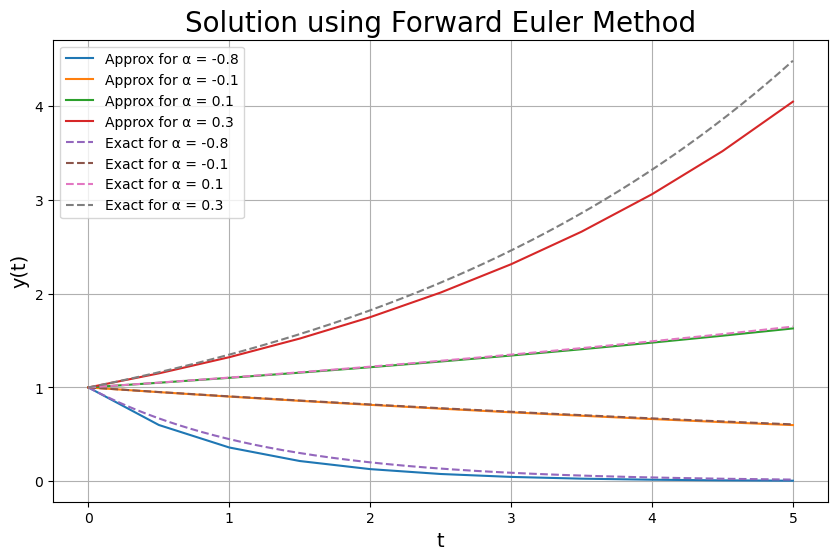

In [6]:
# Forward Euler Method
def forwardEulerMethod(f, y0, alpha, h):
    timeArr = np.linspace(0, 5, 11)
    retArr = [y0]
    for i in timeArr[1:]:
        uN = retArr[-1] + h * f(retArr[-1], alpha)
        retArr.append(uN)
    return retArr, timeArr

# IVP Function
def func(y, alpha):
    return alpha * y

# Exact Solution Function
def trueFunc(x, alpha):
    return np.exp(alpha * x)

# Parameters
h = (5 - 0) / 10
alphas = [-0.8, -0.1, 0.1, 0.3]

# Plotting Forward Euler Method
plt.figure(figsize=(10, 6))
for alpha in alphas:
    retArr, timeArr = forwardEulerMethod(func, 1, alpha, h)
    plt.plot(timeArr, retArr, label=f'Approx for α = {alpha}')

# Plotting Exact Results    
xArr = np.linspace(0, 5, 1000)
for alpha in alphas:
    yArr = trueFunc(xArr, alpha)
    plt.plot(xArr, yArr, label=f'Exact for α = {alpha}', linestyle = '--')

# Graph Settings
plt.title('Solution using Forward Euler Method', fontsize = 20)
plt.xlabel('t', fontsize = 14)
plt.ylabel('y(t)', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

### 3.9) b)

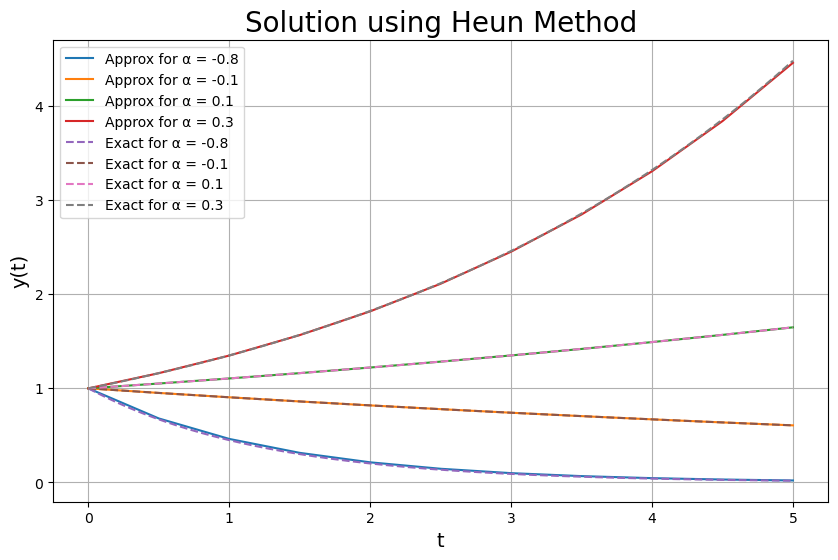

In [7]:
# Heun method
def heunMethod(f, y0, alpha, h):
    timeArr = np.linspace(0, 5, 11)
    retArr = [y0]
    for i in timeArr[1:]:
        uEul = retArr[-1] + h * f(retArr[-1], alpha) # value from Forward Euler 
        uNext = retArr[-1] + 0.5 * h * (f(retArr[-1], alpha) + f(uEul, alpha)) # Heun method
        retArr.append(uNext)
    return retArr, timeArr

# Parameters
h = (5 - 0) / 10
alphas = [-0.8, -0.1, 0.1, 0.3]

# Plotting Heun Method
plt.figure(figsize=(10, 6))
for alpha in alphas:
    retArr, timeArr = heunMethod(func, 1, alpha, h)
    plt.plot(timeArr, retArr, label=f'Approx for α = {alpha}')

# Plotting exact results    
xArr = np.linspace(0, 5, 1000)
for alpha in alphas:
    yArr = trueFunc(xArr, alpha)
    plt.plot(xArr, yArr, label=f'Exact for α = {alpha}', linestyle = '--')

# Graph Settings
plt.title('Solution using Heun Method', fontsize = 20)
plt.xlabel('t', fontsize = 14)
plt.ylabel('y(t)', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

From our 'Solution using Forward Euler Method', we see that there are larger discrepancies between approximated and exact solutions compared to using the Heun method as shown in the graph above. The forward Euler method performs better for $\alpha = \pm 0.1$ than to itself at $\alpha = -0.8, 0.3$. This can be seen by comparing the absolute difference between the exact and approximated solution. In the Heun method, all values of $\alpha$ seem to have very little discrepancies between the approximate and exact solutions. Interestingly, with the Forward Euler method, for $\alpha = -0.8, 0.3$ our approximation looks like an underestimation as the approximated line is below exact solution line. Also looking at the Forward Euler method, our approximation for $\alpha = -0.8$ improves as t increases (i.e. error is decreasing) but for $\alpha = 0.3$, as t increases, the error between our approximated solution and the exact solution increases. 

Overall, the Heun method would be the better choice to generate an approximate solution since the error is smaller than with the Forward Euler method.